In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from flaml import AutoML


rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

# Inspecting FLAML's cross validation

This notebook shows how to perform cross-validation using FLAML, retrieving the sklearn splitter used at the end of the procedure.

> The [relevant example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html) from the sklearn documentation has been used as a starting point. However, in this example, we set the label as uniform across the whole dataset to avoid having groups associated to a single label.


## Group K fold
Generate a multi class classification problem with suitable properties to run cross validation:

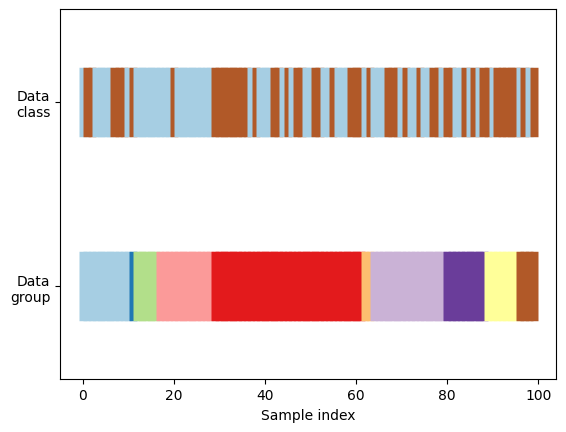

In [16]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

np.random.seed(2023)
y = (np.random.rand(n_points) > 0.5).astype(int)  # modified to avoid groups having uniform label
# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")

In [17]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object.
       Function source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html
    """

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)

Run flaml, evaluating the results on a cross-validation, without setting groups first. This applies the default split settings
Set keep_search_state to True to then recover the splitter object.

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `us

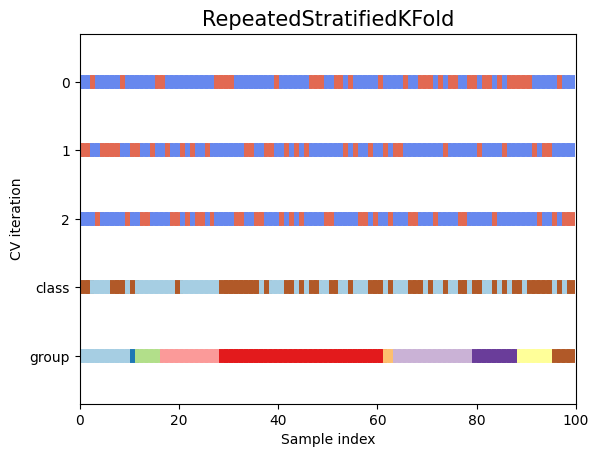

In [27]:

automl = AutoML()
settings = {
    "time_budget": 3,  # total running time in seconds
    "metric": 'accuracy', 
    "estimator_list": ["rf", "kneighbor", "xgboost"],
    "task": 'classification',  # task type    
    "log_file_name": 'undestanding_cross_validation_default.log',
    "log_training_metric": True,  # whether to log training metric
    "keep_search_state": True, # needed if you want to keep the cross validation information
    "eval_method": "cv",
    #"split_type": "group",
    #"groups": groups,
    "n_splits": 3
}

automl.fit(X, y, **settings)

f, ax = plt.subplots(1,1)
plot_cv_indices(automl._state.kf, X, y, groups, ax, automl._state.kf.get_n_splits())

Set the split type to groups and provide the groups to run a GroupKFold instead

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `us

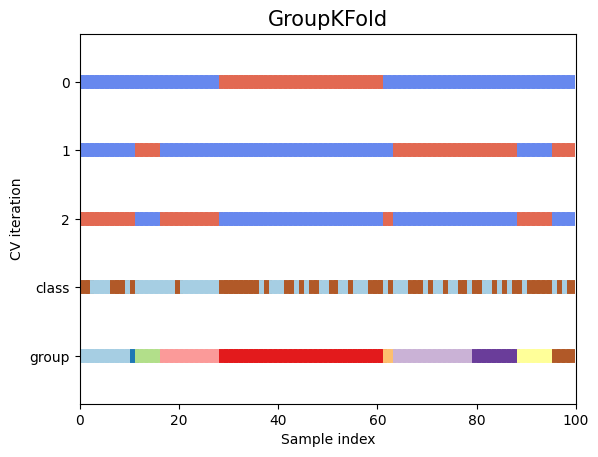

In [31]:
settings["split_type"] = "group"
settings["groups"] = groups
settings["log_file_name"] = 'undestanding_cross_validation_groupkfold.log'

automl = AutoML()
automl.fit(X, y, **settings)

f, ax = plt.subplots(1,1)
plot_cv_indices(automl._state.kf, X, y, groups, ax, automl._state.kf.get_n_splits())